# Loan Data


## Context
This dataset ([source](https://www.kaggle.com/itssuru/loan-data)) consists of data from almost 10,000 borrowers that took loans - with some paid back and others still in progress. It was extracted from lendingclub.com which is an organization that connects borrowers with investors. We've included a few suggested questions at the end of this template to help you get started.

In [1]:
# Load packages
import numpy as np 
import pandas as pd 

## Load your data

In [2]:
# Load data from the csv file
df = pd.read_csv('loan_data.csv', index_col=None)

# Change the dots in the column names to underscores
df.columns = [c.replace(".", "_") for c in df.columns]
print(f"Number of rows/records: {df.shape[0]}")
print(f"Number of columns/variables: {df.shape[1]}")
df.head()

Number of rows/records: 9578
Number of columns/variables: 14


,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


## Understand your variables

In [3]:
# Understand your variables
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])

for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
    
# Join with the variables dataframe
var_dict = pd.read_csv('variable_explanation.csv', index_col=0)
variables.set_index('Variable').join(var_dict)

,Number of unique values,Values,Explanation
Variable,,,
credit_policy,2,"[1, 0]",1 if the customer meets the credit underwritin...
purpose,7,"[debt_consolidation, credit_card, all_other, h...",The purpose of the loan.
int_rate,249,"[0.1189, 0.1071, 0.1357, 0.1008, 0.1426, 0.078...",The interest rate of the loan (more risky borr...
installment,4788,"[829.1, 228.22, 366.86, 162.34, 102.92, 125.13...",The monthly installments owed by the borrower ...
log_annual_inc,1987,"[11.35040654, 11.08214255, 10.37349118, 11.299...",The natural log of the self-reported annual in...
dti,2529,"[19.48, 14.29, 11.63, 8.1, 14.97, 16.98, 4.0, ...",The debt-to-income ratio of the borrower (amou...
fico,44,"[737, 707, 682, 712, 667, 727, 722, 677, 662, ...",The FICO credit score of the borrower.
days_with_cr_line,2687,"[5639.958333, 2760.0, 4710.0, 2699.958333, 406...",The number of days the borrower has had a cred...
revol_bal,7869,"[28854, 33623, 3511, 33667, 4740, 50807, 3839,...",The borrower's revolving balance (amount unpai...


In [4]:
# Start coding 

# Introduction
 Loans Landscape
 




# Problem definition

What question are we answering?

# Performance metrics

What metrics will I use to evaluate the model? i.e. Precision, recall, etc

# Data Manipulation and Exploratory Data Analysis

In [5]:
#Import the modules for EDA, Data manipulation, Algebra, Stats, and visualization
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#Explore the data types
df.dtypes

credit_policy          int64
purpose               object
int_rate             float64
installment          float64
log_annual_inc       float64
dti                  float64
fico                   int64
days_with_cr_line    float64
revol_bal              int64
revol_util           float64
inq_last_6mths         int64
delinq_2yrs            int64
pub_rec                int64
not_fully_paid         int64
dtype: object

In [7]:
#Check for missing values in the data
assert df.isnull().sum().sum() == 0

In [8]:
#Check for duplicates
assert df.duplicated().sum() == 0

In [9]:
#Modify the data types in accordance with variable explanation
to_category = ['credit_policy', 'purpose','not_fully_paid']

df[to_category] = df[to_category].astype('category')

In [10]:
#Create a new column binning the FICO credit scores as per forbes
cut_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Exceptional']
cut_bins = [300, 580, 670, 740, 800, 850]
              
df['fico_cat'] = pd.cut(df['fico'], bins = cut_bins, labels=cut_labels)
df.dtypes

credit_policy        category
purpose              category
int_rate              float64
installment           float64
log_annual_inc        float64
dti                   float64
fico                    int64
days_with_cr_line     float64
revol_bal               int64
revol_util            float64
inq_last_6mths          int64
delinq_2yrs             int64
pub_rec                 int64
not_fully_paid       category
fico_cat             category
dtype: object

## Numerical Variables

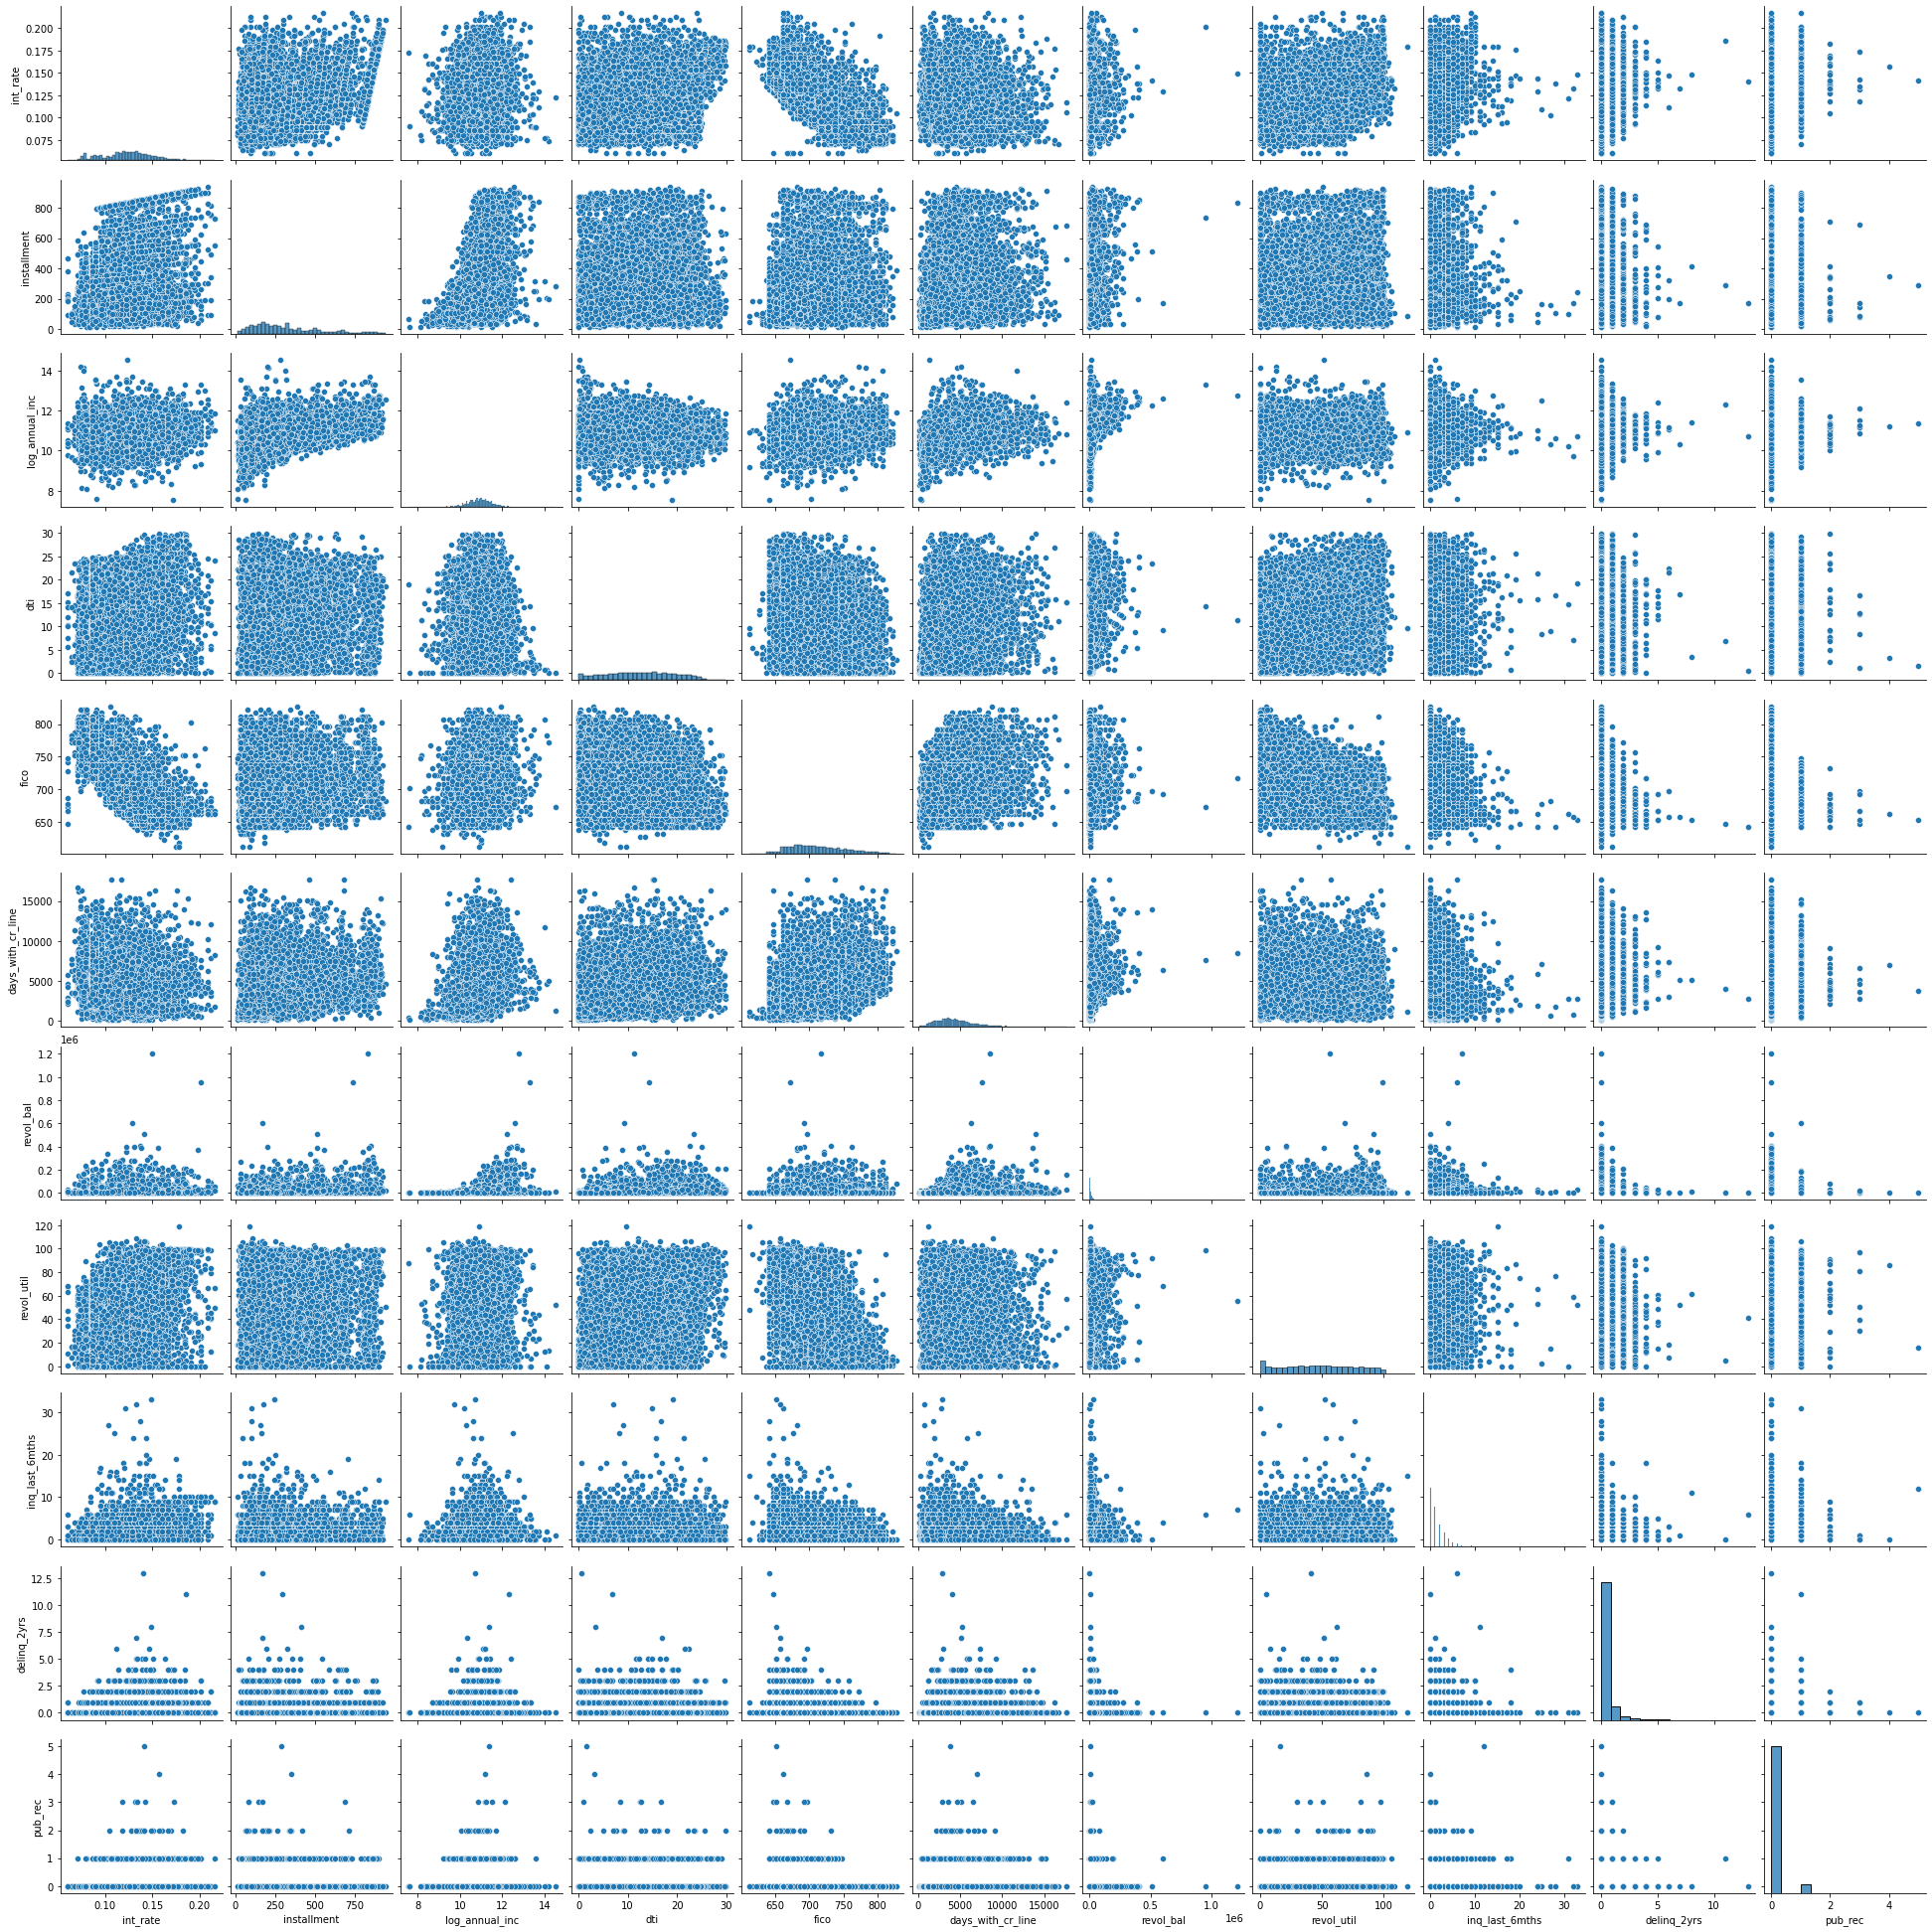

In [11]:
#Select only the numerical variables and plot a pairplot
num = ['int_rate', 'installment', 'log_annual_inc', 'dti', 'fico', 
       'days_with_cr_line', 'revol_bal', 'revol_util', 'inq_last_6mths', 
       'delinq_2yrs', 'pub_rec']

sns.pairplot(df[num])
plt.show()

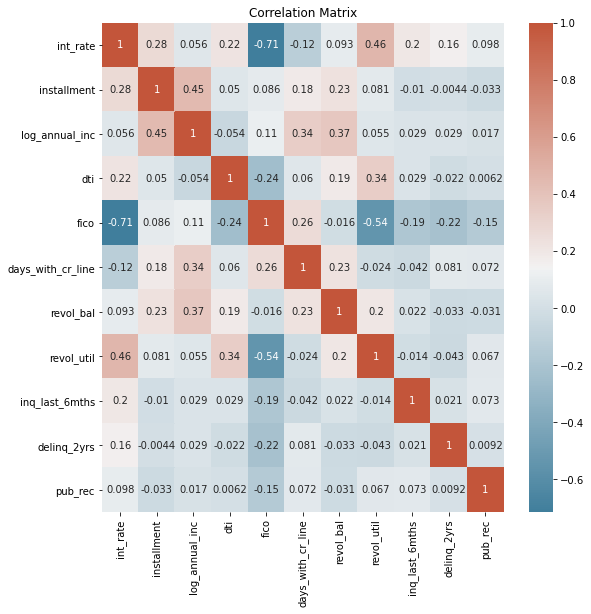

In [12]:
# Calculate the correlation coefficients
corr = df[num].corr()
#Create the heat map
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#Set the figure size
plt.subplots(figsize=(9,9)) 
#Set and show the plot
sns.heatmap(corr, cmap=cmap, annot=True)
plt.title('Correlation Matrix')
plt.show()

### Insights

Using data analysis, useful insights can be extracted from the data:

* What proportion of loans are left unpaid?
* Do people with good credit scores receive better interest rates?
* Do peoplewith higher income do a better job paying their loans?
* What is the frecuency of each loan purpose?


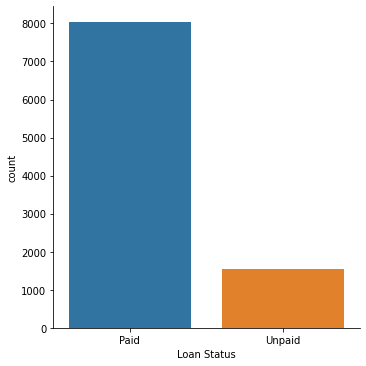

In [13]:
#Plot barplots to compare paid vs unpaid
ax = sns.catplot(x='not_fully_paid', kind='count', data=df)
ax.set_xticklabels(['Paid', 'Unpaid'])
plt.xlabel('Loan Status')
plt.show()

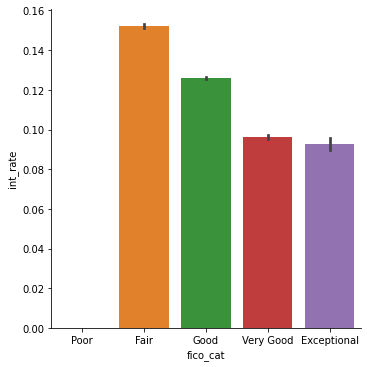

In [14]:
#Plot the average interest rate by credit score
sns.catplot(x='fico_cat', y='int_rate', kind='bar', data=df)

In [15]:
df.fico.min()

612

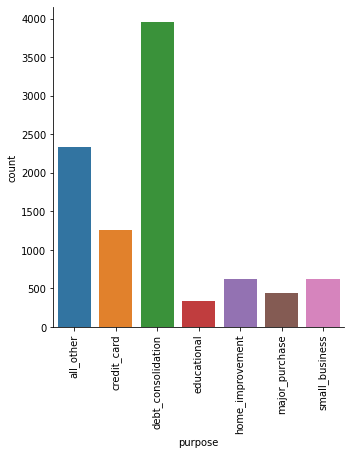

In [16]:
#Plot the number of loans per purpose
sns.catplot(x='purpose', kind='count', data=df)
plt.xticks(rotation=90)
plt.show()

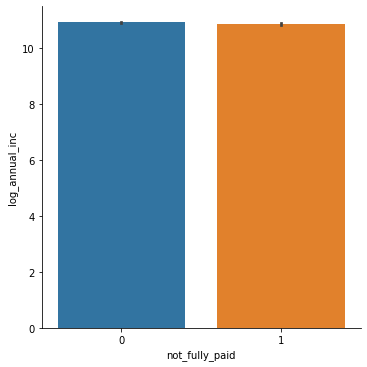

In [17]:
sns.catplot(x='not_fully_paid', y='log_annual_inc', kind= 'bar', data=df)

# Model Development

Imbalanced dataset:
- Oversample
- Undersample
- Penalize

In [18]:
#Import Machine Learning Modules
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [19]:
df.dtypes

credit_policy        category
purpose              category
int_rate              float64
installment           float64
log_annual_inc        float64
dti                   float64
fico                    int64
days_with_cr_line     float64
revol_bal               int64
revol_util            float64
inq_last_6mths          int64
delinq_2yrs             int64
pub_rec                 int64
not_fully_paid       category
fico_cat             category
dtype: object

In [20]:
#Select features and label

X = df[['credit_policy', 'purpose', 'int_rate', 'installment', 'log_annual_inc',
       'dti', 'fico', 'days_with_cr_line', 'revol_bal', 'revol_util',
       'inq_last_6mths', 'delinq_2yrs', 'pub_rec']]

y = df['not_fully_paid']

In [21]:
#Encode categorical feature that contains strings
enc = LabelEncoder()
X['purpose'] = enc.fit_transform(X['purpose'])

#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, random_state=42)

In [29]:
#Setup a SVC model and add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True, C = 0.01, kernel ='poly')

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_train)
print(classification_report(y_train, svc_predict))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      5637
           1       0.31      0.02      0.04      1067

    accuracy                           0.84      6704
   macro avg       0.57      0.51      0.47      6704
weighted avg       0.76      0.84      0.77      6704



In [23]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': 'balanced',
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': True,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
#Hyperparameter tunning
#from sklearn.model_selection import GridSearchCV

#param_grid = {'C': [0.1,1, 10, 100], 
              #'gamma': [1,0.1,0.01,0.001],
              #'kernel': ['rbf', 'poly', 'sigmoid']}

#grid = GridSearchCV(svc_model,param_grid,refit=True,verbose=2)
#grid.fit(X_train,y_train)
#print(grid.best_estimator_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   9.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.9s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   8.0s


In [30]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'C': [0.1,1, 10, 100], 
              'gamma': [1,0.1,0.01,0.001],
              'kernel': ['rbf', 'poly', 'sigmoid']}

svc_random = RandomizedSearchCV(estimator = SVC(class_weight='balanced', probability=True),
                                param_distributions = param_grid, n_iter = 20,
                               cv = 3, verbose=2, random_state=42, n_jobs = -1, scoring='f1')

# Fit the random search model
svc_random.fit(X_train, y_train)

print(svc_random.best_params_)
print(svc_random.best_score_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


KeyboardInterrupt: 